# EF d'Hermitte en Dynamique - Vibrations libres 

**Formulation et mise en oeuvre d'éléments finis de poutres à interpolations d'Hermitte en flexion et linéaire en tension**

***S. Drapier, Novembre 2024***

Cette partie décrit la formulation du problème de vibrations, avec l'introduction de la **matrice de masse élémentaire** qui permet de déterminer les charges et modes de vibration par résolution du **calcul aux valeurs propres** associé.

On se réfère ici aux détails donnés dans l'[introduction](EF_Hermitte_main.ipynb) et au Chapitre 4 (et Chapitre 6) de https://www.emse.fr/~drapier/index_fichiers/CoursPDF/Meca-Structu2A/SDrapier_Meca-struct-num_2024.pdf

$$
\def\vec#1{\overrightarrow{#1}} 
\def\dint{\displaystyle \int}%
\def\dsum{\displaystyle \sum}%
\def\dsqrt{\displaystyle \sqrt}%
\def\df#1#2{{\dfrac{d #1}{d #2}}}
\def\tens#1{\underline{\underline{#1}}}
\def\vect#1{\left\{\mathbf{#1}\right\}}
\def\mat#1{\left[\mathbf{#1}\right]}
\def\vecd#1#2{\begin{Bmatrix} #1 \\ #2 \end{bmatrix}}
$$

## Cinématique de Bernoulli (sans cisaillement) en dynamique
Pour aboutir au PPV rappelé dans l'introduction "EF_Hermitte_main", on associe un champ cinématique variable en temps à la cinématique de la poutre déjà postulée - <a href="EF_Hermitte_main#Equation-1">Eq. (1.1)</a>. On tire de ces variations en temps la puissance virtuelle des quantités d'accélération telle que 
$$\begin{equation}
	\begin{array}{rcl} 
	\delta \mathcal{P}_{acc}(\delta\vec{u}(x,t)) &=&\dint_{0}^{l}
		\left\{\rho S \ddot{u}(x,t) \delta u(x,t)+ \rho S \ddot{v}(x,t) \delta v(x,t) + \right. \cancel{<\rho I> \ddot{v''}(x,t) \delta v(x,t) } \}dl 
	\end{array}
\end{equation}$$
où on néglige classiquement le terme dû à l'accélération des rotations des sections devant les termes induits par les mouvements de corps rigides des section - *cf* remarque plus générale ci-dessous -. On rappelle que les dérivées sont notées de façon simplifiée : dérivées spatiales $\left( \frac{d\ \Box}{dx} = \Box ' \right)$ et dérivées temporelles $\left( \frac{d\ \Box}{dt} = \dot \Box \right)$. Les contraintes généralisées restent inchangées, si ce n'est qu'elles peuvent également varier en temps puisque les contraintes peuvent aussi dépendre du temps.

A partir du PPV en dynamique, on peut étudier la réponse temporelle de structures, en utilisant des schémas de résolution en temps en plus des schémas de résolution en espace. La réponse temporelle, *i.e.* le champ de déplacement en temps et en espace est alors recherché en fonction des états initiaux sous la forme $\left\{ \mathcal U (\vec x,t) \right\}_{(R)}$.

Toutefois, dans le but de préparer ces calculs, et notamment de pouvoir réaliser une **projection dans la base modale** pour réduire la taille du systèmes discret à inverser - cf http://www.emse.fr/~drapier/index_fichiers/CoursPDF/Dynamique-3A/DS-SDrapier_2023.pdf -, un préalable consiste à déterminer les caractéristiques vibratoires de la structure en l'absence de sollicitations extérieures : les **pulsations** (ou fréquences) naturelles, ou **propres**, et les **modes** (déformées) associées. 

## Formulation du problème de vibration libre

Partant du PPV, nous allons formuler le problème à résoudre pour déterminer les pulsations propres et les modes propres de vibration associés. En l'absence de sollicitations extérieures, et pour un temps donné, les expressions du PPV s'écrivent :
$$\begin{equation}
	\begin{array}{l}
		\delta \mathcal{P}_{int}(\delta\vec{u}(\vec{x},t))-\delta \mathcal{P}_{acc}(\delta\vec{u}(\vec{x},t)) =0\hspace{.3cm},\forall
		\delta\vec{u}(\vec{x},t) \in C.A.(0)\\[+1em]
        \dint_{0}^{l} \left\{N(x,t)\:\delta e_x (x,t) + M(x,t)\:\delta \kappa_z(x,t) \right\}dl + \dint_{0}^{l}
		 \rho S\left\{ \ddot{u}(x,t) \delta u(x,t)+ \ddot{v}(x,t) \delta v(x,t) \right\}dl
	\end{array} \tag{2.1}
\end{equation}$$

### Champ solution
Le champ cinématique va être recherché en découplant le problème en espace et en temps sous la forme $\vec u(x,t)=\vec U(x)e^{i\omega t}$. Ce qui revient à supposer une réponse temporelle en phase pour tous les *ddl*s de la poutre. Le problème à résoudre se réduit dès lors à une discrétisation telle que celle mise en place pour le cadre statique linéaire <button onclick="window.open('EF_Hermitte_Lineaire.ipynb', '_blank')"> EF_Hermitte_Lineaire </button>.

En introduisant ce champ dans le PPV, la formulation intégrale faible devient :
$$\begin{equation}
	\begin{array}{rcl}
		\dint_{0}^{l} \left\{N(x,t)\:\delta e_x (x,t) + M(x,t)\:\delta \kappa_z(x,t) \right\}dl &+ &\rho S \dint_{0}^{l} \left\{ \ddot{u}(x,t) \delta u(x,t)+ \ddot{v}(x,t) \delta v(x,t) \right\}dl =0\hspace{.3cm},\forall \delta\vec{u}(\vec{x},t) \in C.A.(0) 		\\[+1em]
		\mathrm{e}^{i \omega t} \left( \dint_{0}^{l} \left\{N(x,t)\:\delta E_x (x) + M(x,t)\:\delta K_z(x) \right\} dl \right. &- \omega^2 & \left.   \dint_{0}^{l} \rho S \left\{ U(x) \delta U(x)+ V(x) \delta V(x) \right\} dl \right)=0
	\end{array} 
\end{equation}$$
où les grandeurs cinématiques correspondent maintenant à ce que nous avons vu en statique linéaire et seront discrétisées dans le repère local de la poutre, pour les déplacements $ U(x) \ \vec{x}+ V(x) \ \vec{y} \ \simeq \; <\mathbf N^e(x)> \cdot \vect{q^e} $ (<a href="EF_Hermitte_main#Equation-1.6">Eq. 1.6</a>), et pour les déformations et courbures $E_x (x) \ \vec{x} + K_z(x) \ \vec z \ \simeq \; \mat{B_L^e} \cdot \vect{u^e}$ (<a href="EF_Hermitte_main#Equation-1.7">Eq. 1.7</a>).

**Remarques :** L'hypothèse de vibration en phase pour tous les *ddl*s de la poutre se justifie par la formulation cinématique adoptée : par des considérations géométriques et matérielles, on ramène l'étude d'un solide 3D à celle d'un solide 1D où tout est défini sur sa ligne moyenne à partir des mouvements relatifs de sections voisines. Dans le même esprit, la vibration des *ddl*s en phase postulée ici correspond à des modes de vibration de type *corps rigide* des sections. En dynamique, ces sections vont essentiellement être soumises à des accélérations transverses $\ddot v(\vec x,t) \ \vec x$ et longitudinales $\ddot u(\vec x,t) \ \vec y$, et pour des fréquences de vibrations relativement basses. Une étude dynamique du solide 3D conduirait à déterminer des modes de vibrations très localisés et pour de hautes fréquences, mais à un coût de calcul très onéreux.

### Discrétisation en tension-compression
Comme pour la rigidité établie en statique, nous allons utiliser l'interpolation linéaire en déplacment pour discrétiser la contribution axiale du déplacement. Pour un seul élément la forme à discrétiser en tension seul s'écrit assez simplement :
$$\begin{equation}
		-\delta \mathcal{P}_{int}(\delta u(x),t) + \delta \mathcal{P}_{acc}(\delta u(x),t)
		=0, \ \forall \delta u(x,t)\:C.A.(0)  \xrightarrow{\text{élémentaire}}
\mathrm{e}^{i \omega t} \left( \dint_{x_1}^{x_2} N^h(x)\:\delta U'^h(x) dx^h - \omega^2  \dint_{x_1}^{x_2} \rho S\: U(x) \: \delta U(x) dx^h\right)
\end{equation}$$

En introduisant la même discrétisation linéaire (<a href="EF_Hermitte_main#Equation-1.4">Eq. 1.4</a>) pour le champ recherché et le champ test sous la forme $U^{h,e}(x)=\dsum_{i=1}^2 
N_i(x)u_i=\dsum_{i=1}^2 N_i(x) \ q^e_{i,t}$ et *en considérant des propriétés constantes par élément*, on obtient le système algébrique élémentaire, la formulation élémentaire s'écrit
$$\begin{equation}
	\begin{array}{l}
	\mathrm{e}^{2i \omega t} \left( \dsum_{i=1}^2  \left\{  \dsum_{j=1}^2  E^eS^e \dint_{x_1}^{x_2} \left( \delta q_{i,t}^{e} \dfrac{d{N}_i}{dx} \dfrac{d{N}_j}{dx^2} q_{j,t}^{e}\:dx^h - \omega^2 \: \rho^e S^e \dint_{x_1}^{x_2} \delta q_{i,t}^{e} {N}_i \: l{N}_j  q_{j,t}^{e}\:dx^h\right)  \right\} \right) \\[1.5em]
	\Leftrightarrow	\dsum_{i=1}^2  \delta q_{i,t}^{e} \left\{  \dsum_{j=1}^2 \delta q_{j,t}^{e}  \left( E^{e}S^{e} \dint_{x_1}^{x_2} \dfrac{d{N}_i}{dx} \dfrac{d{N}_j}{dx} \:dx^h  - \omega^2 \rho^e S^e  \dint_{x_1}^{x_2} {N}_i \: {N}_j \:dx^h \right) \right\}\\[1.5em]
	\Leftrightarrow \dsum_{i=1}^2  \dsum_{j=1}^2 \delta q^{e}_{i,t} K^{e}_{ij,t} \; q_{j,t}^{e} - \omega^2 \dsum_{i=1}^2 \dsum_{i=1}^2 \delta q^{e}_{i,t} M^{e}_{ij,t} \; q_{j,t}^{e}
\end{array}
\end{equation}$$
avec la matrice de rigidité $\mat K^e$ symétrique définie positive déjà définie pour le cas linéaire (<a href="EF_Hermitte_main#Equation-1">Eq. 2.1</a>) et la matrice de masse, elle aussi symétrique et définie positive (liée à la structure quadratique en vitesses de l'énergie cinétique relative) et également exprimée dans le repère local :
$$\begin{equation}
	\begin{array}{rcl}
		\text{Matrice de masse élémentaire en tension}\hspace{15pt}
		M_{ij,t}^e&=&\rho^eS^e \dint_{x_1}^{x_2} N_j(x) N_i(x) \;dx^h %\\[+1.5em]
        \\ \Downarrow \\
	 	\mat{M^e_t}&= &\dfrac{\rho^e S^e l_e}{6}\begin{bmatrix}
	 		2 & 1\\
	 		 & 2 \end{bmatrix}
	\end{array}
\end{equation} \tag{3.1}$$
On pourra utiliser ultérieurement la masse de l'élément $m^e=\rho^e S^e l_e$.

### Discrétisation en flexion
La même démarche s'applique évidemment aux vibrations propres en flexion.
$$\begin{equation}
		-\delta \mathcal{P}_{int}(\delta v(x),t) + \delta \mathcal{P}_{acc}(\delta v(x),t)
		=0, \ \forall \delta v(x,t)\:C.A.(0)  \xrightarrow{\text{élémentaire}}
\mathrm{e}^{i \omega t} \left( \dint_{x_1}^{x_2} M^h(x)\:\delta V''^h(x) dx^h - \omega^2  \dint_{x_1}^{x_2} \rho S\: V(x) \: \delta V(x) dx^h\right)
\end{equation}$$
qui conduit, en utilisant l'approximation nodale $V^{h,e}(x)=\dsum_{i=1}^4 \mathcal N_i(x)\ q^e_{i,f}$ (<a href="EF_Hermitte_main#Equation-1.5">Eq. 1.5</a>)
$$\begin{equation}
	\begin{array}{l}
	\mathrm{e}^{2i \omega t} \left( \dsum_{i=1}^4  \left\{  \dsum_{j=1}^4 E^eI^e \dint_{x_1}^{x_2}  \delta q_{i,f}^{e} \dfrac{d^2\mathcal{N}_i}{dx^2} \dfrac{d^2\mathcal{N}_j}{dx^2} q_{j,f}^{e} \:dx^h - \omega^2 \: \rho^e S^e \dint_{x_1}^{x_2} \delta q_{i,f}^{e} \mathcal{N}_i \: \mathcal{N}_j  q_{j,f}^{e}\:dx^h  \right\} \right)\\[1.5em]
	\Leftrightarrow	\dsum_{i=1}^4  \delta q_{i,f}^{e} \left\{  \dsum_{j=1}^4 \delta q_{j,f}^{e}  \left( E^{e}S^{e} \dint_{x_1}^{x_2} \dfrac{d^2\mathcal{N}_i}{dx^2} \dfrac{d^2\mathcal{N}_j}{dx^2} \:dx^h  - \omega^2 \rho^e S^e  \dint_{x_1}^{x_2} \mathcal{N}_i \: \mathcal{N}_j \:dx^h \right) \right\}\\[1.5em]
	\Leftrightarrow \dsum_{i=1}^4  \dsum_{j=1}^4 \delta q^{e}_{i,f} \left( K^{e}_{ij,f} \; q_{j,f}^{e} - \omega^2  M^{e}_{ij,f} \ \right)
    \end{array}
\end{equation}
$$
La rigidité en flexion a déjà été introduite dans le cas linéaire (<a href="EF_Hermitte_main#Equation-1">Eq. 2.2</a>), et la matrice de masse en flexion est définie par:
$$\begin{equation}
	\begin{array}{rcl}		\text{Matrice de masse élémentaire en flexion}\hspace{15pt}
		M^e_{ij,f}&=&\rho^e \:S^e \dint_{x_1}^{x_2} \mathcal{N}_i \mathcal{N}_j \:dx^h \\ \Downarrow \\
		\mat{M^e_f}&=& \dfrac{\rho\:S^e\:l_e}{420} \begin{bmatrix}
			156 & 22l_e & 54 & -13l_e \\
			& 4(l_e)^2 & 13l_e & -3(l_e)^2 \\
			&  & 156 & -22l_e \\
			&  &  &  4(l_e)^2
		\end{bmatrix} \\
	\end{array}
\end{equation} \tag{3.2}$$

### Matrice de masse en tension-flexion :
En assemblant les contributions de tension et de flexion, on exprime la matrice de masse élémentaire. L'assemblage se fait relativement aux *ddl*s concernés, tout d'abord dans le repère local de la poutre  
$$
\mat{M^e}_{(l)} = \dfrac{\rho^e\:S^e\:l_e}{420}  \left[ 
\begin{array}{cccccc|c}
     u_1 & v_1 & \theta_1 & u_2 & v_2 & \theta_2 &\\[0.2em]
    \hline
    140 & 0 & 0 & 70 & 0 & 0 & u_1 \\[0.5em]
     & 156  & 22l_e  & 0 & 54  & -13 l_e  & v_1 \\[0.5em]
     &  & 4 l_e^{2}  & 0 & 13l_e  & -3l_e^2 & \theta_1 \\[0.5em]
     &  &  & 140 & 0 & 0 & u_2 \\[0.5em]
     &  &  &  & 156  & -22l_e  & v_2 \\[0.5em]
     &  &  &  &  & 4l_e^2  & \theta_2 \\[0.5em]
\end{array} \right]
$$

Comme pour la rigidité (<a href="EF_Hermitte_main#Equation-1">Eq. 2.3</a>), la matrice de masse doit être exprimée dans le repère de structure grâce au changement de base introduit précédemment (<a href="EF_Hermitte_main#Equation-1.8">Eq. 1.8</a>) : $\vect{q^e}_{(l)}=\mat{R}^T \vect{q^e}_{(g)}$. Ce même changement de base va conduire à la même forme $\mat{M^e}_{(g)}=\mat{R} \mat{M^e}_{(l)}  \mat{R}^T$:
$$\hspace{-1em}
\mat{M^e}_{(g)} = \dfrac{\rho^e\:S^e\:l_e}{420} \left[ 
\begin{array}{cccccc|c}
    u_1^1 & u_2^1 & \theta^1 & u_1^2 & u_2^2 & \theta^2 &\\
    \hline \\
    140C^{2} + 156 S^{2} & -16C S & -22 S l_e & 70C^{2} +54 S^{2} & 16CS & 13 S l_e & u_1^1 \\[0.5em]
         & 156 C^{2} + 140 S^{2} & 22 Cl_e & 16C S & 54 C^{2} +70 S^{2} & -13 C l_e & u_2^1 \\[0.5em]
           &  & 4 l_e^{2} & -13 S l_e & 13 C l_e & -3 l_e^{2} & \theta^1 \\[0.5em]
             &  &  & 140C^{2} + 156 S^{2} & -16 C S & 22 S l_e & u_1^2 \\[0.5em]
                &  &  &  & 156 C^{2} + 140 S^{2} & -22 C l_e & u_2^2 \\[0.5em]
                  &  &  &  &  & 4 l_e^{2} & \theta^2 \\[0.5em]
\end{array} \right] \tag{3.3}
$$

## Détermination des pulsations et modes propres de vibration
A partir de la formulation du problème, la détermination des pulsation (ou fréquences) de vibrations naturelles se fait par **calcul des valeurs propres** du système dérivant du PPV discrétisé obtenu après assemblage des contibutions élémentaires 
$$
 	\mat{K_0}-\omega^2\mat{M}=0.
$$ 
On rappelle que le **nombre de ces valeurs propres** est égal au **nombre de *ddl*s** de la discrétisation, *i.e.* égale au rang du système algébrique. Les modes propres associés sont ensuite déterminés en injectant chaque valeur propre dans le système initial et en calculant les relations entre les *ddl*s de ces vecteurs définis à une constante multiplicative près. Ils sont souvent normalisés, *i.e.* tels que $\| \vect X_i \|=1$

**Remarque sur les conditions de Dirichlet**
Le système étudié étant libre de toute sollicitation, cela inclut des conditions de Dirichlet qui ne seraient pas homogènes. Pour les conditions homogènes, nous avons vu dans le cas linéaire qu'elles sont prises en compte en imposant 
$$
q_i=0 \Rightarrow \begin{cases} M_{ii}=0 \\ M_{ij}=0 \end{cases}
$$
Dans le calcul des valeurs propres, ces relations vont se traduire en autant de valeurs propres unités que de termes diagonaux unités. Selon le spectre des valeurs propres attendu, il peut ne pas être simple de distinguer les *bonnes* des *mauvaises* valeurs propres. Une façon de contourner cette difficulté consiste à imposer les termes $M_{ii}=0$, ce qui se traduira par des valeurs propres infinies, plus simples à isoler. Par contre, la matrice de masse ne sera plus définie positive dans ce cas mais sans grande conséquence sur la détermination des valeurs propres.

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Novembre 2024

@author: S. Drapier

"""

import sys
path = ""
sys.path.append(path)

import numpy as np
import Hermitte_NL_Classes as Cl


# Initialisation de ce qui est de dimension connue
nb_elem = 0
nb_nodes = 0
    
nodes_global = []
fixed_dofs = []
elem_global = []
nodes_elem = []

In [47]:
""" 1/ Maillage = 
- définitions des noeuds = construire la liste nodes_global avec des objets noeuds; 
peut être fait à partir d'un fichier texte contenant 3 colonnes : num_noeud, x, y'
- définition des connectivités = donner une liste nodes_elem;
peut être fait à partir d'un fichier texte contenant 3 colonnes : num_elem, noeud1, noeud 2
l'ordre des noeuds définit l'orientation : les charges réparties sont appliquées dans le repère LOCAL

Utilisation d'une fonction pour 1 poutre simple (tests) ou lecture depuis fichiers de définition des noeuds et des connectivités
"""

# A/ maillage d'une poutre test : définition du maillage de 'Nl' éléments orientés d'un angle 'angle'
# Fonction de Maillage d'une poutre droite : Cl.fonct_Maille_Poutre(longueur, Nl, angle)
longueur = 2.
Nl = 1
angle = 0.

""" Création de la liste des noeuds - la position du noeud en partant de 0 est celle qui servira
à stocker les ddls, indépendamment de son numéro """
nodes_global, nodes_elem = Cl.fonct_Maille_Poutre(longueur, Nl, 0)

# B/ Maillage à partir de 2 fichiers: définition des noeuds (num_node, x, y) et défintion des éléments (num_elem, inode1, inode2) 
#nodes_global, nodes_elem = Cl.fonct_Maille_depuis_Fichier(path+'portique_noeuds.txt', path+'portique_elem.txt')
# nodes_global, nodes_elem = Cl.fonct_Maille_depuis_Fichier('poutreH_noeuds.txt', 'poutreH_elem.txt')
nb_elem = len(nodes_elem)

# Les propriétés et chargements répartis des éléments peuvent être précisés dans un np.array
E = 70.E9
rho = 2.6E3
bs = 0.15
hs = 0.3
ES = E * bs * hs
EI = E * bs * hs**3/12
Smasse = rho * bs * hs # masse de la section
meca_elem = np.repeat([[ES, EI,Smasse]], nb_elem,axis=0)

px = 0.
py = 0.
px_py = np.repeat([[px, py]],nb_elem,axis=0)

props_elem = [meca_elem, px_py]

In [48]:
""" 2/ Créé un objet "problème éléments finis" à partir d'une liste de noeuds et des propriétés Meca_elem et efforts linéiques px_py
"""
pb = Cl.pbEF_poutre(nodes_global, nodes_elem, props_elem)

# Créé le maillage correspondant aux connectivités et assemble les grandeurs (K_global, M_global, F_rep)
pb.Maillage_Assemblage()

#Cl.Creation_Elem_Assemblage(pb, 100, 5, 9, [ES, EI,Smasse], [px, py])

# 2/ Conditions aux limites
total_dofs = pb.total_dofs

# inutile ici car vibration naturelles
CL_force = []#,[11,3,2E3]]
CL_bloque = [[1,1],[1,2],[1,3]]#,[11,1],[11,3]]

pb.Application_CL(CL_force, CL_bloque)


K_global, Kgeom_global, M_global = pb.K_global, pb.Kgeom_global, pb.M_global
F_con, F_rep, F_tot = pb.F_con, pb.F_rep, pb.F_tot
elem_global = pb.elem_global

# Cl.Creation_Elem_Assemblage(pb, 100, 5, 9, [ES, EI,Smasse], [px, py])

<Axes: >

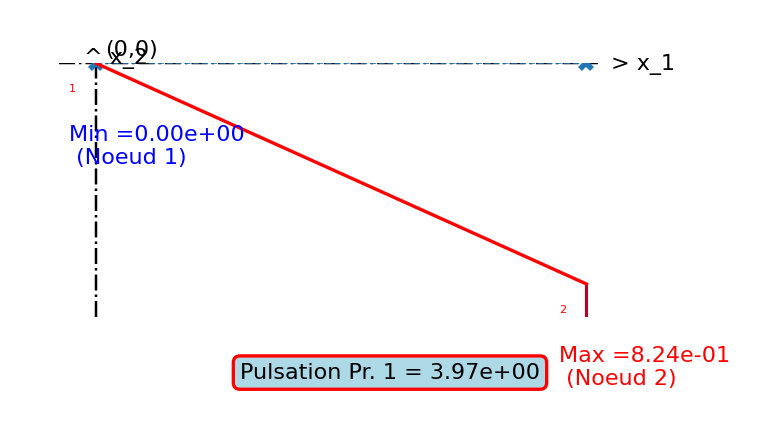

In [49]:
"""
Calcul des pulsations et modes de vibration naturels
"""

charge_min=[]
mode=[]
charge_min0, mode0 = pb.Calcul_Modes_Propres('Vibration', 3)

# Si on veut afficher les qtités associées aux modes propres - définis à une constant près !
# pb.Calcul_Def_Eff()

pb.Affichage('X', '', vp = 1)

# Exemple de mise à jour de propriétés d'éléments
for ind_elem, elem_temp in enumerate(elem_global):
    Cl.Modif_Proprietes_Elem(pb, elem_temp.num_elem, ES, EI, Smasse*10000)

charge_min1, mode1 = pb.Calcul_Modes_Propres('Vibration', 5)

pb.Affichage('X', '', vp = 1)

In [54]:
print(charge_min0, charge_min1)
%who_ls

[ 396.86575188 3910.19346831 4493.58517136] [ 3.96865752 39.10193468 44.93585171]


['CL_bloque',
 'CL_force',
 'Cl',
 'E',
 'EI',
 'ES',
 'F_con',
 'F_rep',
 'F_tot',
 'K_global',
 'Kgeom_global',
 'M_global',
 'Nl',
 'Smasse',
 'angle',
 'bs',
 'charge_min',
 'charge_min0',
 'charge_min1',
 'elem_global',
 'elem_temp',
 'fixed_dofs',
 'hs',
 'ind_elem',
 'longueur',
 'meca_elem',
 'mode',
 'mode0',
 'mode1',
 'nb_elem',
 'nb_nodes',
 'nodes_elem',
 'nodes_global',
 'np',
 'path',
 'pb',
 'props_elem',
 'px',
 'px_py',
 'py',
 'rho',
 'sys',
 'total_dofs']

In [52]:
print(pb.elem_global[0])

Elément1 
 Noeud 1, x1 = 0.000000, x2 = 0.000000, 
 u = 0.000000, v = 0.000000, 
 u1 = -0.000000, u2 = -0.000000, 
 theta = -0.0 
 position = 0 
 Noeud 2, x1 = 2.000000, x2 = 0.000000, 
 u = 0.000000, v = 0.000000, 
 u1 = -0.000000, u2 = -0.823561, 
 theta = -0.5672279424052261 
 position = 1 
 
 angle = 0.0 degrès, 
 longueur = 2.0, ES = 3150000000.0, EI = 23624999.999999996, Smasse = 11700000.0, 
 px = 0.0, py = 0.0, 
